In [1]:
%matplotlib inline

import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, linear_model, model_selection, pipeline, decomposition, ensemble, svm

/Users/frjo6001/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_pickle('./process.pkl')
cn = {v:k for v,k in enumerate(df.columns)}
cn

{0: 'Time',
 1: 'Main Engine Fuel Consumption (MT/day)',
 2: 'Main Engine Using HFO (bool)',
 3: 'Main Engine Using MGO (bool)',
 4: 'Draft Forward (meters)',
 5: 'Draft Aft (meters)',
 6: 'Draft Mid-1 (meters)',
 7: 'Draft Mid-2 (meters)',
 8: 'Shaft Speed (RPM)',
 9: 'Shaft Torque (kNm)',
 10: 'Shaft Power (kW)',
 11: 'Speed Over Ground (knots)',
 12: 'Speed Through Water (knots)',
 13: 'Heading (degrees)',
 14: 'Rudder Angle (degrees)',
 15: 'Weather Service Apparent Wind Speed (knots)',
 16: 'Weather Service Apparent Wind Direction (degrees from bow)',
 17: 'Weather Service True Wind Speed (knots)',
 18: 'Weather Service True Wind Direction (degrees from north)',
 19: 'Weather Service Temperature (celsius)',
 20: 'Water Depth (meters)',
 21: 'datetime',
 22: 'contig',
 23: 'trip',
 24: 'heading_delta',
 25: 'active',
 26: 'trim',
 27: 'rudder',
 28: 'depth',
 29: 'current',
 30: 'bowWind_sine',
 31: 'bowWind_cos',
 32: 'heading_delta2',
 33: 'wind_speed'}

In [3]:
from sklearn.base import BaseEstimator, TransformerMixin
class ColSelector(BaseEstimator, TransformerMixin):
    def __init__(self, colNames):
        self.colNames = colNames
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.colNames].values.astype(float)

In [4]:
c=ColSelector(['depth','rudder','trim','bowWind_sine','bowWind_cos','heading_delta2','wind_speed'])
x = c.transform(df)

In [5]:
test = [142., 230., 228., 232., 192., 326., 176., 256., 328., 270.]
        
df_test = df[df.trip.isin(test)]
df      = df[~df.trip.isin(test)]

gkf = model_selection.GroupKFold(4)
g = list(gkf.split(X=df.trip,groups=df.trip))

In [6]:
cols = ['wind_speed','bowWind_cos','bowWind_sine','current',
        'depth','rudder','trim','heading_delta2', 
        cn[4],cn[8]
       ]



power = [ ('power',ColSelector(cols)),
          ('normalize',preprocessing.StandardScaler()),
          ('fit',linear_model.LinearRegression())
        ]

p = pipeline.Pipeline(steps=power)


In [9]:
p_grid = [ {'fit':[
                   ensemble.RandomForestRegressor(n_estimators=100,max_depth=8,oob_score=True)
                  ],
               }
             ]




xvalid = model_selection.GridSearchCV(p,p_grid,cv=g)

xvalid = xvalid.fit(df, df[cn[11]].values)


In [10]:
e = xvalid.best_estimator_
e = e.fit(df, df[cn[1]].values)

y_pred = e.predict(df_test)
e.score(df_test,df_test[cn[1]])

0.9815778479950954

In [11]:
e

Pipeline(memory=None,
     steps=[('power', ColSelector(colNames=['wind_speed', 'bowWind_cos', 'bowWind_sine', 'current', 'depth', 'rudder', 'trim', 'heading_delta2', 'Draft Forward (meters)', 'Shaft Speed (RPM)'])), ('normalize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('fit', RandomForestRegressor(bootstr...timators=100, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False))])

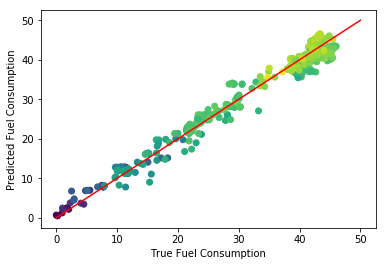

In [12]:
#import seaborn as sns

#cmap = sns.cubehelix_palette(as_cmap=True)

plt.scatter(df_test[cn[1]].values, y_pred, c=df_test[cn[12]])
plt.plot(np.linspace(0,50,2),np.linspace(0,50,2),'r')
plt.ylabel('Predicted Fuel Consumption')
plt.xlabel('True Fuel Consumption')
plt.savefig('/Users/frjo6001/Desktop/fig.pdf',format='pdf')

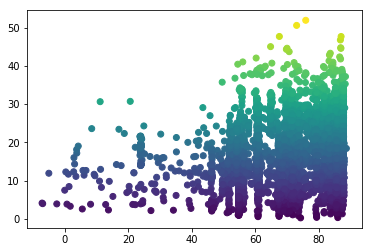

In [25]:
plt.scatter(df[cn[8]], df[cn[15]], c=df[cn[15]])
#plt.xlabel('Fuel Consumption')
#plt.ylabel('Speed Over Ground')
plt.savefig('/Users/frjo6001/Desktop/fig.pdf',format='pdf')

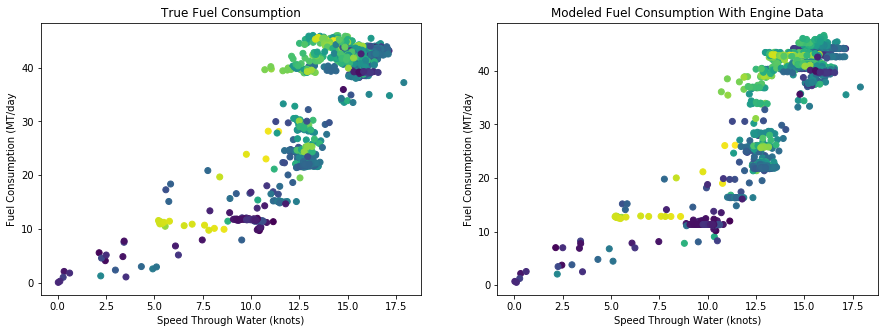

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(df_test[cn[11]],df_test[cn[1]], c=df_test[cn[15]])
plt.title('True Fuel Consumption')
plt.xlabel('Speed Through Water (knots)')
plt.ylabel('Fuel Consumption (MT/day')
plt.subplot(122)
plt.scatter(df_test[cn[11]],y_pred, c=df_test[cn[15]])
plt.title('Modeled Fuel Consumption With Engine Data')
plt.xlabel('Speed Through Water (knots)')
plt.ylabel('Fuel Consumption (MT/day')

plt.savefig('/Users/frjo6001/Desktop/fig.pdf',format='pdf')

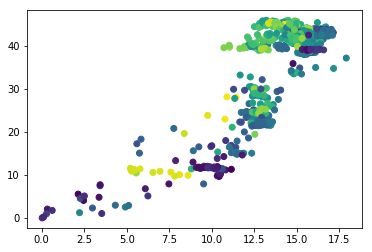

In [976]:
plt.scatter(df_test[cn[12]],df_test[cn[1]], c=df_test[cn[15]])

In [977]:
df_test[cn[15]].min(); cn[15]

'Weather Service Apparent Wind Speed (knots)'

In [978]:
xvalid.cv_results_

/Users/frjo6001/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/frjo6001/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/frjo6001/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, *

{'mean_fit_time': array([1.50785375]),
 'std_fit_time': array([0.01563783]),
 'mean_score_time': array([0.01011276]),
 'std_score_time': array([0.00107771]),
 'param_fit': masked_array(data=[RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'fit': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
     

In [979]:
df_test_zero_wind = copy.deepcopy(df_test)
df_test_zero_wind[cn[15]] = 0

y_pred_no_wind = e.predict(df_test_zero_wind)

Text(0,0.5,'Fuel Consumption (MT/day')

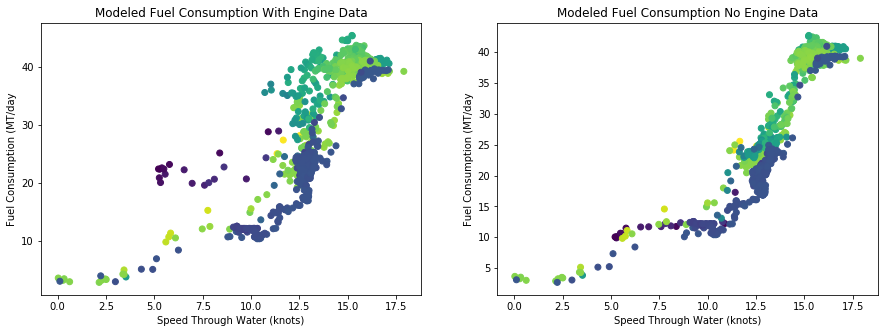

In [980]:
plt.figure(figsize=(15,5))
plt.subplot(121)

plt.scatter(df_test[cn[12]],y_pred, c=df_test[cn[4]])
plt.title('Modeled Fuel Consumption With Engine Data')
plt.xlabel('Speed Through Water (knots)')
plt.ylabel('Fuel Consumption (MT/day')

plt.subplot(122)
plt.scatter(df_test[cn[12]],y_pred_no_wind, c=df_test[cn[4]])
plt.title('Modeled Fuel Consumption No Engine Data')
plt.xlabel('Speed Through Water (knots)')
plt.ylabel('Fuel Consumption (MT/day')

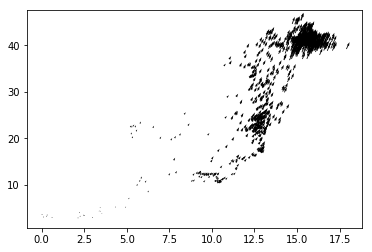

In [981]:
plt.quiver(df_test[cn[12]],
           y_pred,
           df_test[cn[12]],
           y_pred_no_wind
          )
plt.savefig('/Users/frjo6001/Desktop/t.pdf',format='pdf')

In [982]:
RF=e.steps[-1][1]
RF.feature_importances_

array([0.00483138, 0.00473301, 0.00470608, 0.00120936, 0.00584877,
       0.00719849, 0.01693755, 0.00136015, 0.86035764, 0.03444373,
       0.05837384])

In [983]:
cn[11],cn[4]

('Speed Over Ground (knots)', 'Draft Forward (meters)')

In [984]:
order = np.argsort(RF.feature_importances_)[::-1].astype(int)

In [985]:
RF.feature_importances_[order]

array([0.86035764, 0.05837384, 0.03444373, 0.01693755, 0.00719849,
       0.00584877, 0.00483138, 0.00473301, 0.00470608, 0.00136015,
       0.00120936])

In [986]:
o=[]
for i in order:
    o.append(cols[i])

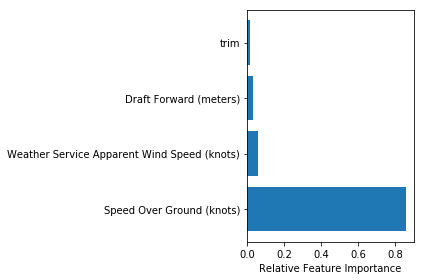

In [987]:
plt.barh(range(4), RF.feature_importances_[order][0:4])
plt.yticks(range(4),o[0:4])
plt.xlabel('Relative Feature Importance')
plt.tight_layout()
plt.savefig('/Users/frjo6001/Desktop/t.pdf',format='pdf')